<a href="https://colab.research.google.com/github/PriyankaGona/MachineLearning-Assignments/blob/master/hw2_model4_Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required headers and libraries are imported
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [0]:
# Required variables are declared
batch_size = 32
num_classes = 10
epochs = 100

validation_loss = list()
validation_accuracy = list()

#Loading and shuffling Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



split_index = int(0.8 * x_train.shape[0])


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [0]:
def getModel(input_shape):
  
	model = Sequential()

	model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
	model.add(Activation('relu'))

	model.add(Conv2D(32, (3, 3)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.25))

	model.add(Conv2D(64, (3, 3), padding='same'))
	model.add(Activation('relu'))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Dropout(0.25))

	model.add(Conv2D(128, (2, 2), padding='same'))
	model.add(Activation('relu'))

	model.add(Conv2D(128, (2, 2)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Dropout(0.25))

	model.add(Flatten())

	model.add(Dense(1024))
	model.add(Activation('relu'))

	model.add(Dropout(0.5))

	model.add(Dense(num_classes))
	model.add(Activation('softmax'))
	   
	 
	model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

	return model

In [0]:
def train_model(model, train_x, train_y, validate_x, validate_y):
  # Data Augmentation
	datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest', horizontal_flip=True, vertical_flip=False, rescale=None)

	datagen.fit(train_x)

	for e in range(10):
		batches = 0
		for x_batch, y_batch in datagen.flow(train_x, train_y, batch_size=40000):
			model.fit(x_batch, y_batch)
			batches += 1
			if batches >= 1:
				# we need to break the loop by hand because
				# the generator loops indefinitely
				break
				
				
	return model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(validate_x, validate_y))

In [0]:
# Model is tested on validation data
def test_model(model,validate_x, validate_y):
	
  score = model.evaluate(validate_x, validate_y, verbose=0)
	
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

In [0]:
def plot_training_graph(training_history, foldNumber):
	
	plotaccuracy = plt.plot(range(1,epochs+1), training_history.history['acc'],range(1,epochs+1), training_history.history['val_acc'])
	
	plt.title("Fold Number "+str(foldNumber))
	plt.xlabel('Number of epochs')
	plt.ylabel('Accuracy')

	plt.legend(('Train Accuracy','Test Accuracy'))

	plt.show(plotaccuracy)

	print('\n\nvalidation loss:', training_history.history['val_loss'][-1])
	print('validation accuracy:', training_history.history['val_acc'][-1])

In [0]:
def kfold_validation(k,x_folds,y_folds):

	# Dividing data into training and validation sets
	train_x = list(x_folds)
	validate_x = train_x.pop(k-1)
	train_x = np.concatenate(train_x)

	train_y = list(y_folds)
	validate_y = train_y.pop(k-1)
	train_y = np.concatenate(train_y)

	print("\nnumber of samples in training set: ",len(train_x))
	print("number of samples in validation set: ",len(validate_x))

	input_shape = train_x.shape[1:]
	print("Shape of images: ",input_shape)

	model = getModel(input_shape)

	History = train_model(model, train_x, train_y, validate_x, validate_y)

	validation_loss.append(History.history['val_loss'][-1])
	validation_accuracy.append(History.history['val_acc'][-1])

	test_model(model,validate_x,validate_y)

	plot_training_graph(History, k)

	return model

In [0]:
x_folds = np.array_split(x_train, 5)
y_folds = np.array_split(y_train, 5)

40000/40000 [==============================] - 17s 433us/step - loss: 1.4833 - acc: 0.4540
Epoch 1/1
40000/40000 [==============================] - 17s 435us/step - loss: 1.4197 - acc: 0.4836
Epoch 1/1
40000/40000 [==============================] - 17s 437us/step - loss: 1.3659 - acc: 0.5027
Epoch 1/1
40000/40000 [==============================] - 17s 430us/step - loss: 1.3084 - acc: 0.5271
Epoch 1/1
40000/40000 [==============================] - 17s 432us/step - loss: 1.2714 - acc: 0.5402
Epoch 1/1
40000/40000 [==============================] - 17s 429us/step - loss: 1.2344 - acc: 0.5570
Epoch 1/1
40000/40000 [==============================] - 18s 441us/step - loss: 1.1947 - acc: 0.5716
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 19s 476us/step - loss: 1.0828 - acc: 0.6119 - val_loss: 0.9733 - val_acc: 0.6502
Epoch 2/100
40000/40000 [==============================] - 19s 486us/step - loss: 1.0523 - acc: 0.6251 - val_loss

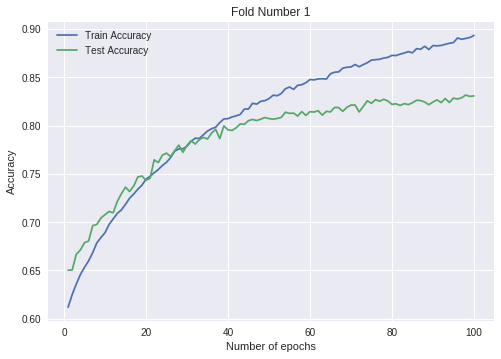



validation loss: 0.5283313675880432
validation accuracy: 0.8308

number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)
Epoch 1/1
40000/40000 [==============================] - 20s 494us/step - loss: 1.9849 - acc: 0.2498
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.6869 - acc: 0.3725
Epoch 1/1
40000/40000 [==============================] - 18s 451us/step - loss: 1.5658 - acc: 0.4254
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.4877 - acc: 0.4535
Epoch 1/1
40000/40000 [==============================] - 18s 446us/step - loss: 1.4211 - acc: 0.4826
Epoch 1/1
40000/40000 [==============================] - 18s 438us/step - loss: 1.3621 - acc: 0.5070
Epoch 1/1
40000/40000 [==============================] - 18s 450us/step - loss: 1.3146 - acc: 0.5248
Epoch 1/1
40000/40000 [==============================] - 19s 464us/step - loss: 1.2756 - acc: 0.5393
Epoch 1/1

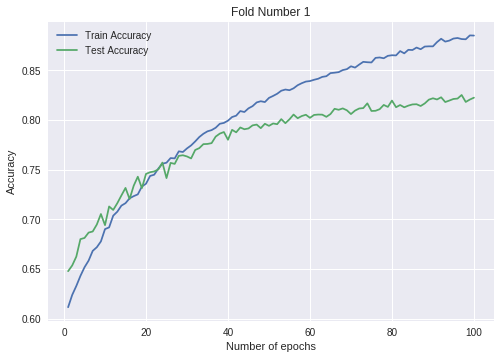



validation loss: 0.5464786044120788
validation accuracy: 0.8225


In [25]:
#get the new training and validation set on fold Number 1 by calling kfold_validation
model = kfold_validation(1,x_folds,y_folds)


In [0]:
#get the new training and validation set on fold Number 2 by calling kfold_validation
model = kfold_validation(2,x_folds,y_folds)


number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)
Epoch 1/1
40000/40000 [==============================] - 20s 493us/step - loss: 1.9762 - acc: 0.2545
Epoch 1/1
40000/40000 [==============================] - 18s 455us/step - loss: 1.6805 - acc: 0.3756
Epoch 1/1
40000/40000 [==============================] - 18s 448us/step - loss: 1.5583 - acc: 0.4234
Epoch 1/1
40000/40000 [==============================] - 18s 452us/step - loss: 1.4778 - acc: 0.4579
Epoch 1/1
40000/40000 [==============================] - 18s 453us/step - loss: 1.4098 - acc: 0.4846
Epoch 1/1
40000/40000 [==============================] - 18s 453us/step - loss: 1.3514 - acc: 0.5108
Epoch 1/1
40000/40000 [==============================] - 18s 454us/step - loss: 1.3037 - acc: 0.5286
Epoch 1/1
40000/40000 [==============================] - 18s 454us/step - loss: 1.2571 - acc: 0.5471
Epoch 1/1
40000/40000 [==============================] - 18s 447us/step - l


number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)
Epoch 1/1
40000/40000 [==============================] - 19s 466us/step - loss: 1.9682 - acc: 0.2600
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.6752 - acc: 0.3740
Epoch 1/1
40000/40000 [==============================] - 17s 435us/step - loss: 1.5620 - acc: 0.4243
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.4739 - acc: 0.4597
Epoch 1/1
40000/40000 [==============================] - 20s 490us/step - loss: 1.4125 - acc: 0.4853
Epoch 1/1
40000/40000 [==============================] - 18s 443us/step - loss: 1.3618 - acc: 0.5046
Epoch 1/1
40000/40000 [==============================] - 18s 440us/step - loss: 1.3121 - acc: 0.5286
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.2744 - acc: 0.5419
Epoch 1/1
40000/40000 [==============================] - 17s 435us/step - l

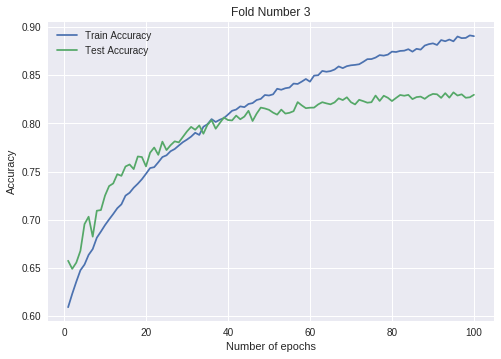



validation loss: 0.5229443846702576
validation accuracy: 0.8296


In [12]:
#get the new training and validation set on fold Number 3 by calling kfold_validation
model = kfold_validation(3,x_folds,y_folds)


number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)
Epoch 1/1
40000/40000 [==============================] - 19s 465us/step - loss: 1.9324 - acc: 0.2646
Epoch 1/1
40000/40000 [==============================] - 18s 449us/step - loss: 1.6650 - acc: 0.3789
Epoch 1/1
40000/40000 [==============================] - 18s 442us/step - loss: 1.5569 - acc: 0.4218
Epoch 1/1
40000/40000 [==============================] - 18s 445us/step - loss: 1.4828 - acc: 0.4511
Epoch 1/1
40000/40000 [==============================] - 19s 487us/step - loss: 1.4192 - acc: 0.4810
Epoch 1/1
40000/40000 [==============================] - 17s 437us/step - loss: 1.3659 - acc: 0.5051
Epoch 1/1
40000/40000 [==============================] - 18s 439us/step - loss: 1.3158 - acc: 0.5230
Epoch 1/1
40000/40000 [==============================] - 18s 443us/step - loss: 1.2677 - acc: 0.5438
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - l

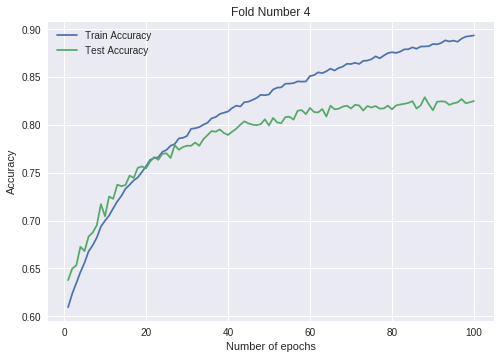



validation loss: 0.5574424630641938
validation accuracy: 0.8249


In [13]:
#get the new training and validation set on fold Number 4 by calling kfold_validation
model = kfold_validation(4,x_folds,y_folds)


number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)
Epoch 1/1
40000/40000 [==============================] - 19s 469us/step - loss: 1.9510 - acc: 0.2587
Epoch 1/1
40000/40000 [==============================] - 18s 439us/step - loss: 1.6944 - acc: 0.3673
Epoch 1/1
40000/40000 [==============================] - 17s 433us/step - loss: 1.5790 - acc: 0.4127
Epoch 1/1
40000/40000 [==============================] - 18s 444us/step - loss: 1.4899 - acc: 0.4474
Epoch 1/1
40000/40000 [==============================] - 20s 488us/step - loss: 1.4288 - acc: 0.4773
Epoch 1/1
40000/40000 [==============================] - 17s 437us/step - loss: 1.3664 - acc: 0.5032
Epoch 1/1
40000/40000 [==============================] - 18s 438us/step - loss: 1.3228 - acc: 0.5236
Epoch 1/1
40000/40000 [==============================] - 18s 444us/step - loss: 1.2780 - acc: 0.5392
Epoch 1/1
40000/40000 [==============================] - 17s 431us/step - l

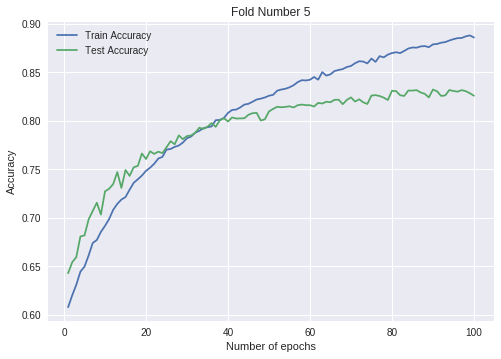



validation loss: 0.53251511759758
validation accuracy: 0.826


In [14]:
#get the new training and validation set on fold Number 5 by calling kfold_validation
model = kfold_validation(5,x_folds,y_folds)

In [15]:
mean_accuracy = np.mean(validation_accuracy)
print('Mean accuracy of K-fold validation ',mean_accuracy)

Mean accuracy of K-fold validation  0.8278800000000001


In [16]:
#evaluating the model on test set
test_model(model,x_test,y_test)

Test loss: 0.5554813200831413
Test accuracy: 0.8206
